<a href="https://colab.research.google.com/github/GaneshaNHotti/DSLAB/blob/main/Linear%26Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm-rf Advertising.csv
!wget https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv

/bin/bash: rm-rf: command not found
--2022-02-18 06:25:16--  https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/plain]
Saving to: ‘Advertising.csv.2’

Advertising.csv.2   100%[===================>]   4.45K  --.-KB/s    in 0s      

2022-02-18 06:25:16 (44.0 MB/s) - ‘Advertising.csv.2’ saved [4555/4555]



In [2]:
#LinearRegression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("Advertising.csv")
print(data.head())
print('\n')

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9




In [5]:
print(data.columns)
print('\n')

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')




In [6]:
print(data.drop(['Unnamed: 0'], axis=1))


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


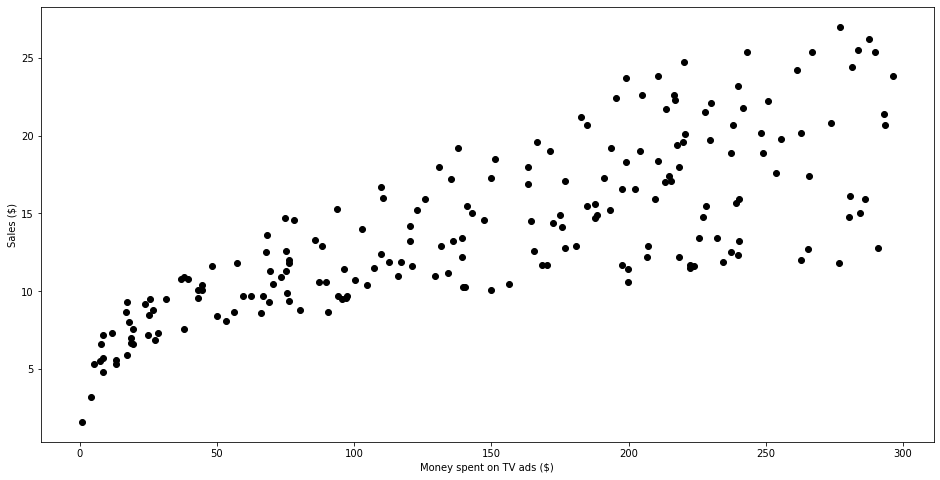

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['Sales'],
 c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [8]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
print("Slope: ",reg.coef_[0][0])
print("Intercept: ",reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

Slope:  0.04959997060149944
Intercept:  6.9209733534993845
The linear model is: Y = 6.921 + 0.0496X


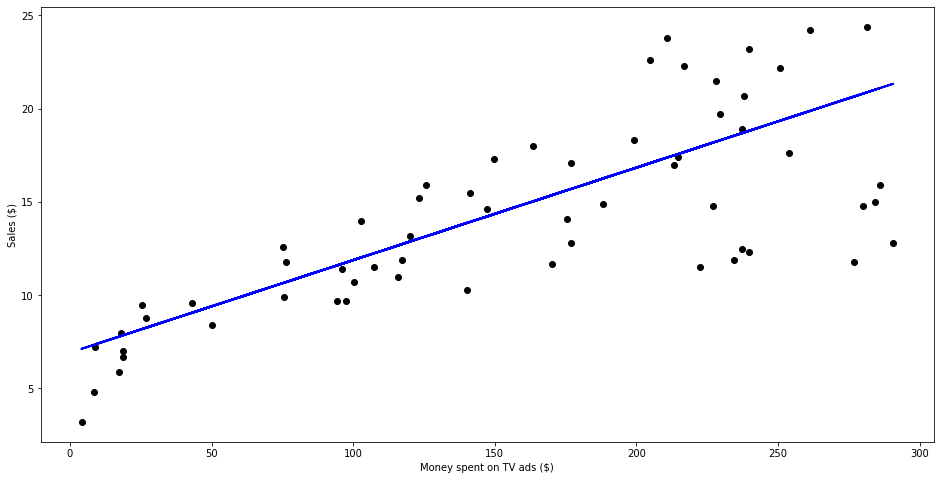

In [10]:
predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
 x_test,
 y_test,
 c='black'
)
plt.plot(
 x_test,
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [11]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  3.4883155043326455


In [12]:
r2 = r2_score(y_test,predictions)
print("R2 = ",r2)

R2 =  0.5301625948612126


In [13]:
#LogisticRegression

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
print(x)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [17]:
print(y)

[0 0 0 0 1 1 1 1 1 1]


In [18]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [19]:
print(model.fit(x, y))
print('\n')

print(model.classes_)
print('\n')

print(model.intercept_)
print('\n')

print(model.coef_)
print('\n')

print(model.predict_proba(x))
print('\n')

print(model.predict(x))
print('\n')

print(model.score(x, y))
print('\n')

LogisticRegression(random_state=0, solver='liblinear')


[0 1]


[-1.04608067]


[[0.51491375]]


[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


[0 0 0 1 1 1 1 1 1 1]


0.9




In [20]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

In [21]:
cm = confusion_matrix(y, model.predict(x))

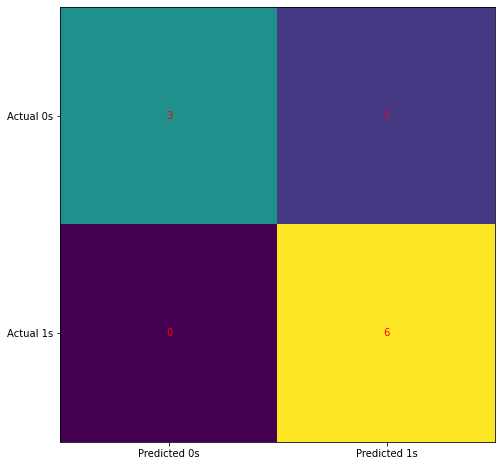

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

